In [1]:
import sys
sys.path.append('d:/flagellar/code/core')
sys.path.append('/flagellar/code/core')
sys.path.append('/flagellar/input/my-flg-library/')
import flg_support as fls
import importlib
import numpy as np
import flg_diagnostics
import flg_numerics
import matplotlib.pyplot as plt
import glob
import copy
importlib.reload(fls);
fls.profiling=False

MainProcess
MainProcess


In [2]:
files = glob.glob(fls.result_dir + '/many_abbr_full/Baseline_*M*')
models = [fls.dill_load(f) for f in files]
models = sorted(models, key=lambda d:d.trained_model.seed)

In [3]:
# for m in models[0:1]:
#     m.trained_model.step1Labels.relative_confidence_threshold = 0.001
#     m.inferred_test_data = m.trained_model.infer(m.test_data)

In [4]:
#fls.dill_save(fls.temp_dir + '/models_reinferred.pickle', models)

In [5]:
data = copy.deepcopy(models[0].inferred_test_data)

In [8]:
def visualize_slice(data, z_list):
    preprocessor = copy.deepcopy(models[0].trained_model.step1Labels.preprocessor)
    #preprocessor.blur_z = 5
    preprocessor.blur_xy = 1
    preprocessor.scale_moving_average = True
    preprocessor.scale_also_moving_std = True
    #preprocessor.moving_ratio = 0.
    data = copy.deepcopy(data)
    preprocessor.load_and_preprocess(data, desired_original_slices = z_list)
    dat = []
    for mm in range(1):
        m = copy.deepcopy(models[mm].trained_model)
        m.step1Labels.preprocessor = preprocessor
        m.step1Labels.relative_confidence_threshold = 0.001
        m.step2Motors.distance_threshold = 10.
        m.run_in_parallel = False
        dat.append (m.infer([data])[0])
    for i_z,z in enumerate(data.slices_present):
    #     if data.slices_present[i_z]==z:
    #         break
    # else:
    #     raise 'stop'
        plt.figure()
        plt.imshow(data.data[i_z,:,:], cmap='bone')
        plt.colorbar()
        plt.title(data.name + ', ' + str(z))
        for d in dat:
            assert d.name == data.name
            to_plot = d.labels_unfiltered2
        
            to_plot = to_plot[to_plot['z']==z]
            print('z: ', z)
            print(to_plot)
    
            plt.scatter(to_plot['x'], to_plot['y'])
#             #print(dat)    
    # for mm in range(1):
    #     # m = copy.deepcopy(models[mm].trained_model)
    #     # m.step1Labels.relative_confidence_threshold = 0.01
    #     # m.step2Motors.distance_threshold = 10.
    #     # m.run_in_parallel = False
    #     # dat = m.infer([data])
    #     dat = models[mm].inferred_test_data
    #     for d in dat:
    #         if d.name == data.name:
    #             to_plot = d.labels_unfiltered2
            
    #             to_plot = to_plot[to_plot['z']==z]
    #             print(to_plot)
        
    #             plt.scatter(to_plot['x'], to_plot['y'])
    #             #print(dat)    

aba2014-02-21-24
   index          z           y           x           tomo_id  dataset_id
0     32  222.65625  613.005172  295.077803  aba2014-02-21-24       10268


/opt/conda/lib/python3.11/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


Clearing cupy
YOLOv9s summary (fused): 197 layers, 7,167,475 parameters, 0 gradients, 26.7 GFLOPs
Processing tomogram aba2014-02-21-24 (1/1)
Processing 17 out of 17 slices (CONCENTRATION=1)
FINAL
     z    y    x  confidence
0  229  424  251    0.760742
1  227  491  930    0.048492
2  219  516  904    0.017853
3  220  386  954    0.001416
4  224  432  953    0.001274
5  220  601  295    0.001216

z:  218
        z    y    x  confidence  i_model
1200  218  425  257    0.020798        0
z:  219
        z    y    x  confidence  i_model
1230  219  516  904    0.017853        0
1231  219  478  940    0.003223        0
1232  219  508  908    0.002050        0
1233  219  475  948    0.001536        0
1234  219  482  934    0.001455        0
1235  219  465  953    0.000782        0
z:  220
        z    y    x  confidence  i_model
1264  220  490  927    0.009232        0
1265  220  460  952    0.002010        0
1266  220  494  921    0.001694        0
1267  220  484  932    0.001549        0
12

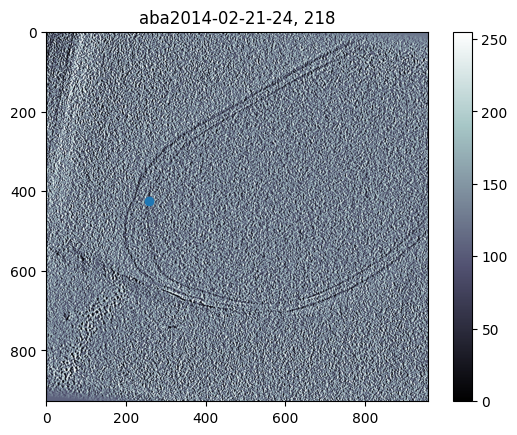

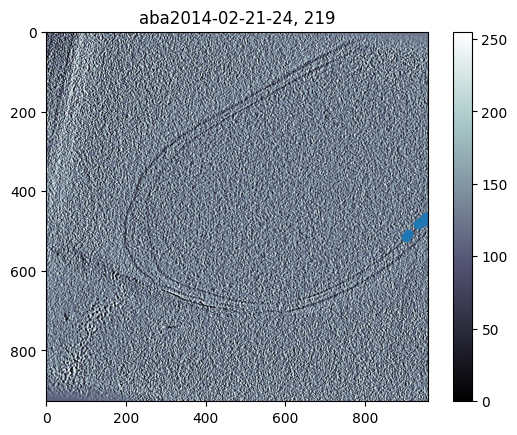

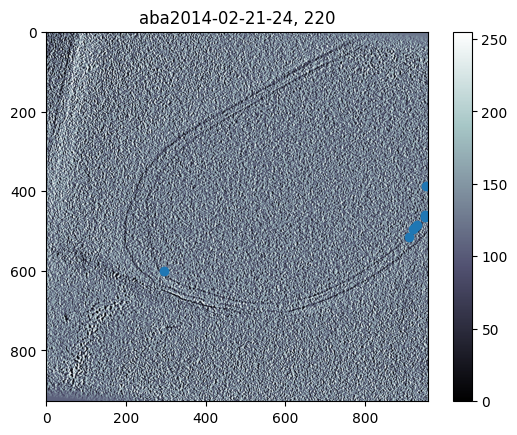

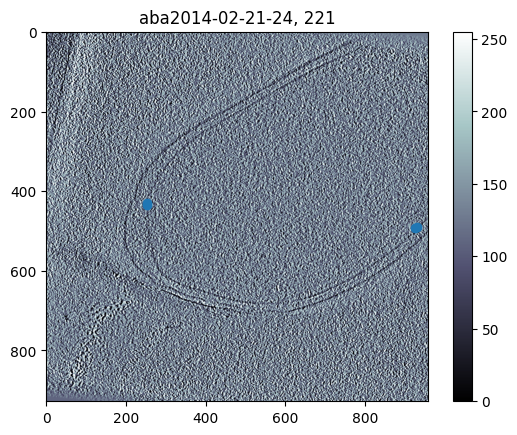

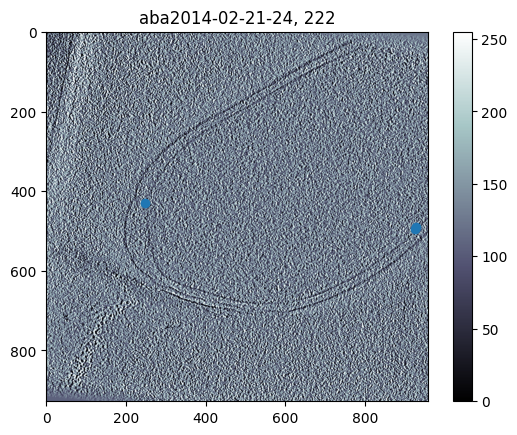

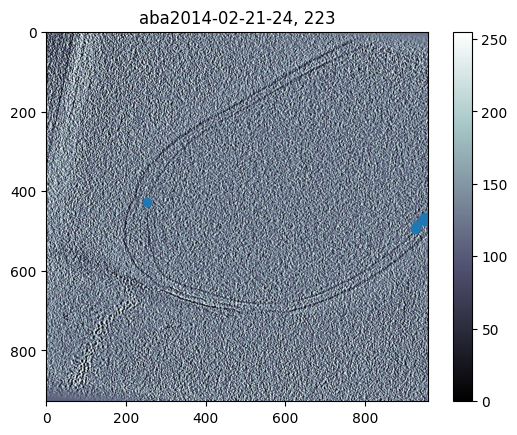

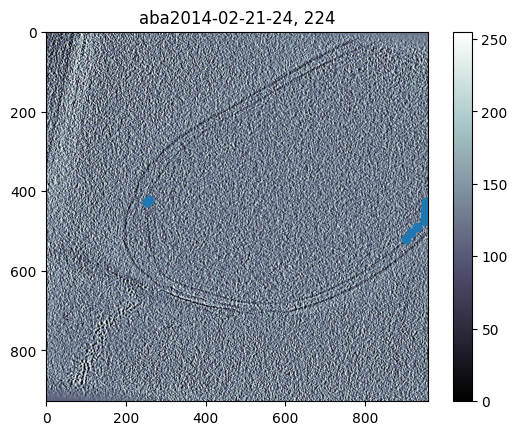

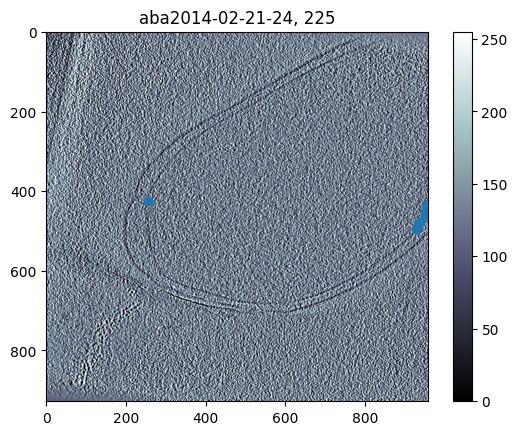

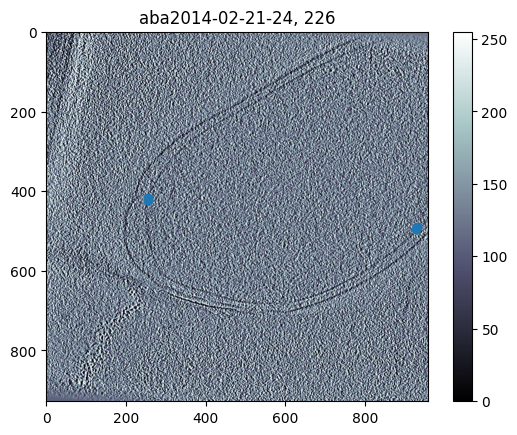

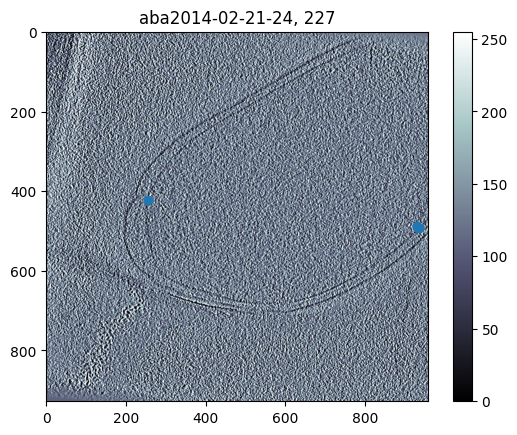

In [9]:
ind = 87
# for d in data:
#     if d.name == 'mba2012-09-19-20':
#         break
#     ind+=1
print(data[ind].name)
print(models[0].test_data[ind].labels)
zz=np.round(models[0].test_data[ind].labels['z'][0]).astype(int)
#zz=373
visualize_slice(data[ind], list(np.arange(zz-5,zz+5)))
#mba2011-12-17-28

In [10]:
data[101]

DataKaggle(is_train=True, name='tomo_8554af', labels=   index    z    y    x  confidence    value
0      0  102  251  545     0.84082  0.84082, labels_unfiltered=     z    y    x  confidence
0  102  251  545    0.840820
1   75  520  782    0.747559, labels_unfiltered2=       z    y    x  confidence  i_model
147   34  548  770    0.229492        0
149   35  548  770    0.571777        0
150   36  549  770    0.424316        0
151   36  550  772    0.258301        0
154   38  553  771    0.247314        0
..   ...  ...  ...         ...      ...
419  123  292  538    0.613281        0
420  124  292  538    0.554688        0
421  125  292  538    0.311523        0
423  126  296  538    0.314941        0
424  127  296  538    0.252441        0

[63 rows x 5 columns], loaded_state='unloaded', data=None, data_shape=(300, 960, 928), voxel_spacing=15.6, resize_factor=1.0, slices_present=[])

In [11]:
for d in fls.load_all_train_data():
    if d.name == 'tomo_8554af':
        print(d)

DataKaggle(is_train=True, name='tomo_8554af', labels=      z      y      x
0  93.0  254.0  549.0, labels_unfiltered=Empty DataFrame
Columns: []
Index: [], labels_unfiltered2=Empty DataFrame
Columns: []
Index: [], loaded_state='unloaded', data=None, data_shape=(300, 960, 928), voxel_spacing=15.6, resize_factor=nan, slices_present=[])


In [61]:
d=data[ind]
preprocessor = copy.deepcopy(models[0].trained_model.step1Labels.preprocessor)
#preprocessor.blur_z = 11
preprocessor.blur_xy = 4
preprocessor.scale_moving_average = True
preprocessor.scale_also_moving_std = False
preprocessor.moving_ratio = 0.3
d = copy.deepcopy(d)
preprocessor.load_and_preprocess(d)

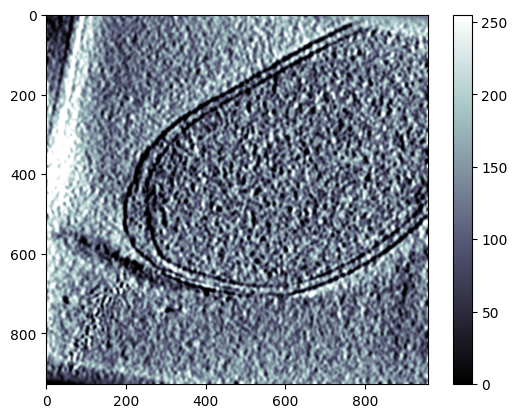

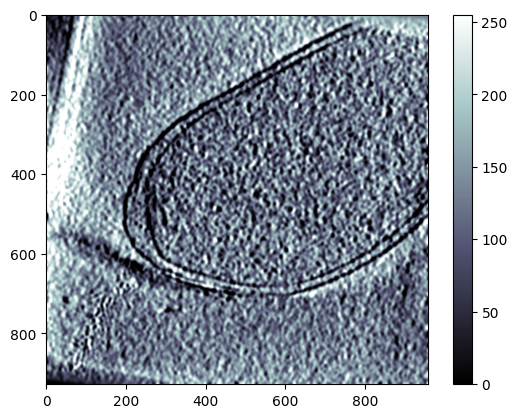

In [62]:
plt.figure();plt.imshow(d.data[8,:,:], cmap='bone');plt.colorbar()
plt.figure();plt.imshow(d.data[9,:,:], cmap='bone');plt.colorbar()
#plt.figure();plt.imshow(d.data[1,:,:].astype(float)-d.data[0,:,:].astype(float), cmap='bone');plt.colorbar()

In [ ]:
import scipy as sp
sp.signal.correlate2d(d.data[0,:,:],d.data[0,:,:])